**Import libraries**

In [118]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [119]:
BATCH_SIZE = 3
IMAGE_SIZE = 256

In [120]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "PlantVillage",
    seed=123,
    shuffle=True,
    image_size = (IMAGE_SIZE, IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 30 files belonging to 3 classes.


In [121]:
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [122]:
len(dataset)

10

In [123]:
for image_batch, label_batch in dataset.take(1):
    print(image_batch[0].shape)

(256, 256, 3)


**Visualize the dataset**

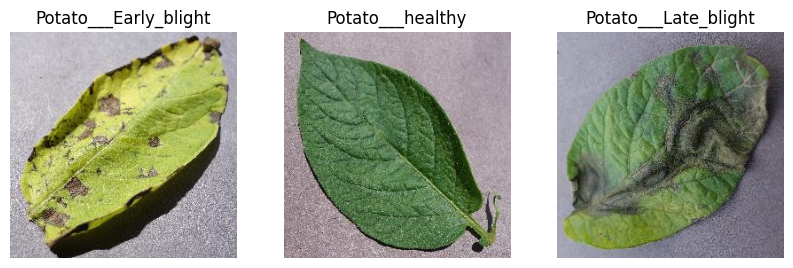

In [124]:
plt.figure(figsize=(10,10))
for image_batch, label_batch in dataset.take(1):
    for i in range(BATCH_SIZE):
        ax = plt.subplot(3,3,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")

80% ==> training
20% ==> 10%validation, 10% 

In [125]:
len(dataset)

10

In [126]:
def get_dataset_partitions_tf(ds, train_split = 0.8, validation_split = 0.1):

    ds_size = len(ds)

    train_size = int(train_split * ds_size)
    validation_size = int(validation_split * ds_size)

    train_dataset = ds.take(train_size)
    validation_dataset = ds.skip(train_size).take(validation_size)
    test_dataset = ds.skip(train_size).skip(validation_size)

    return train_dataset, validation_dataset, test_dataset

In [127]:
train_ds, validation_ds, test_ds = get_dataset_partitions_tf(dataset)
print(len(train_ds))
print(len(validation_ds))
print(len(test_ds))

8
1
1


Cache, Shuffle, and Prefetch the Dataset


In [128]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = validation_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

**Building the Model**


In [130]:

resize_and_rescale = tf.keras.Sequential([
  layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),
  layers.Rescaling(1./255),
])

Data Augmentation (Flipping, Rotation, Zoom)

In [134]:
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(30/360),
    layers.RandomZoom(0.1)
])

augmented_ds = train_ds.map(lambda x, y: (data_augmentation(x), y))
print(augmented_ds)

<_MapDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>


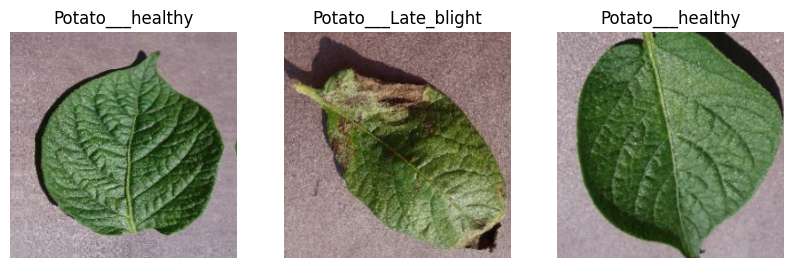

In [138]:
plt.figure(figsize=(10,10))
for image_batch, label_batch in augmented_ds.take(1):
    for i in range(BATCH_SIZE):
        ax = plt.subplot(3,3,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")

Applying Data Augmentation to Train Dataset


In [139]:

train_ds = train_ds.map(
    lambda x, y: (data_augmentation(x, training=True), y)
).prefetch(buffer_size=tf.data.AUTOTUNE)

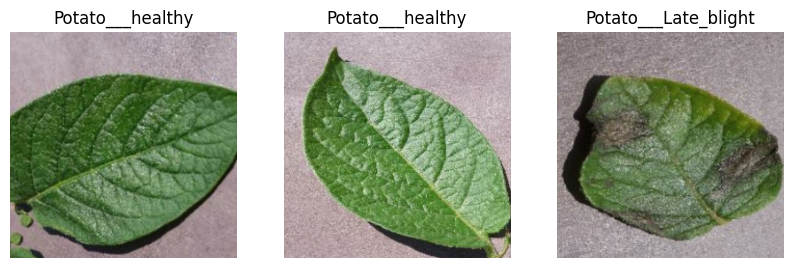

In [145]:
plt.figure(figsize=(10,10))
for image_batch, label_batch in train_ds.take(1):
    for i in range(BATCH_SIZE):
        ax = plt.subplot(3,3,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")